In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/butterfly-images40-species/training.csv.csv
/kaggle/input/butterfly-images40-species/butterflies and moths.csv
/kaggle/input/butterfly-images40-species/EfficientNetB0-100-(224 X 224)- 97.59.h5
/kaggle/input/butterfly-images40-species/valid/PIPEVINE SWALLOW/5.jpg
/kaggle/input/butterfly-images40-species/valid/PIPEVINE SWALLOW/1.jpg
/kaggle/input/butterfly-images40-species/valid/PIPEVINE SWALLOW/4.jpg
/kaggle/input/butterfly-images40-species/valid/PIPEVINE SWALLOW/3.jpg
/kaggle/input/butterfly-images40-species/valid/PIPEVINE SWALLOW/2.jpg
/kaggle/input/butterfly-images40-species/valid/ARCIGERA FLOWER MOTH/5.jpg
/kaggle/input/butterfly-images40-species/valid/ARCIGERA FLOWER MOTH/1.jpg
/kaggle/input/butterfly-images40-species/valid/ARCIGERA FLOWER MOTH/4.jpg
/kaggle/input/butterfly-images40-species/valid/ARCIGERA FLOWER MOTH/3.jpg
/kaggle/input/butterfly-images40-species/valid/ARCIGERA FLOWER MOTH/2.jpg
/kaggle/input/butterfly-images40-species/valid/SIXSPOT BURNET MOTH/5.jpg


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/butterfly-images40-species/training.csv.csv')
df.head()

,Epoch,loss,accuracy,F1_score,val_loss,val_accuracy,val_F1_score
0,1,5.226210,0.75290,0.665162,2.001779,0.938,0.929245
1,2,1.435009,0.94665,0.912901,0.975209,0.954,0.947070
2,3,0.857355,0.97130,0.956363,0.765548,0.960,0.953881
3,4,0.655860,0.98345,0.976639,0.679098,0.958,0.956769
4,5,0.539441,0.99065,0.986101,0.623349,0.954,0.954769


In [4]:
df.columns

Index(['Epoch', 'loss', 'accuracy', 'F1_score', 'val_loss', 'val_accuracy',
       'val_F1_score'],
      dtype='object')

In [5]:
# Check for missing values
print(df.isnull().sum())

Epoch           0
loss            0
accuracy        0
F1_score        0
val_loss        0
val_accuracy    0
val_F1_score    0
dtype: int64


In [6]:
# Show data types and summary
print(df.describe())

           Epoch       loss   accuracy   F1_score   val_loss  val_accuracy  \
count  15.000000  15.000000  15.000000  15.000000  15.000000     15.000000   
mean    8.000000   0.791926   0.974480   0.963767   0.622568      0.962933   
std     4.472136   1.266940   0.062936   0.085742   0.418929      0.009468   
min     1.000000   0.244375   0.752900   0.665162   0.362701      0.938000   
25%     4.500000   0.274155   0.987050   0.981370   0.386609      0.959000   
50%     8.000000   0.358726   0.996150   0.994503   0.466565      0.964000   
75%    11.500000   0.597650   0.998900   0.998234   0.651223      0.969000   
max    15.000000   5.226210   0.999700   0.999058   2.001779      0.974000   

       val_F1_score  
count     15.000000  
mean       0.961134  
std        0.011636  
min        0.929245  
25%        0.955769  
50%        0.962712  
75%        0.969436  
max        0.972000  


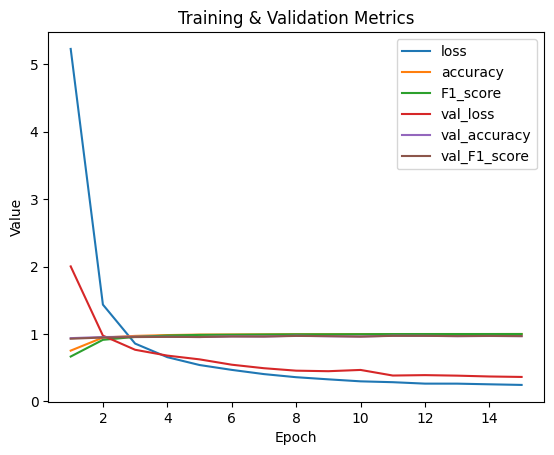

In [7]:
import matplotlib.pyplot as plt

# Plot all training and validation metrics
metrics = ['loss', 'accuracy', 'F1_score', 'val_loss', 'val_accuracy', 'val_F1_score']

for metric in metrics:
    plt.plot(df['Epoch'], df[metric], label=metric)

plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training & Validation Metrics')
plt.legend()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
X = df.drop(['val_F1_score'], axis=1)
y = df['val_F1_score']

In [9]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluate performance
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.5240683085232898
MSE: 0.00015633356710125496


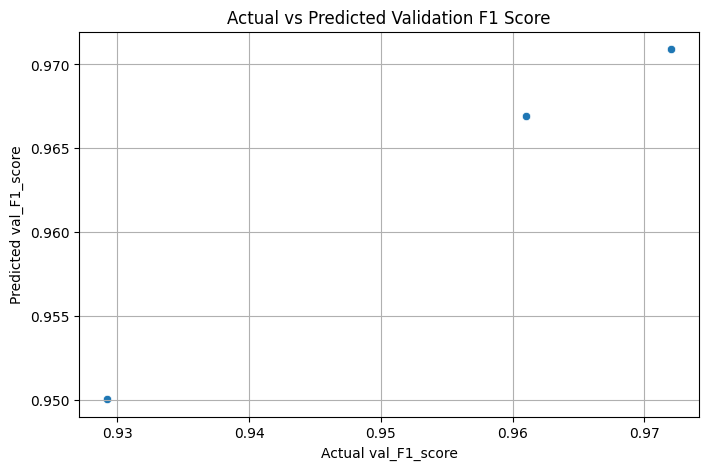

In [12]:
import seaborn as sns

# Scatter plot of true vs predicted
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual val_F1_score')
plt.ylabel('Predicted val_F1_score')
plt.title('Actual vs Predicted Validation F1 Score')
plt.grid(True)
plt.show()